In [1]:
import time
import pycountry
import numpy as np
import wbgapi as wb
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
EmisionesCo2PorPersonaEnToneladas = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="Co2PorPersonaToneladas",index_col="pais")
CantidadDeTuristas = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="Turistas",index_col="pais")
IngresosPorTurista = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="IngresosPorTurista",index_col="pais")
PorcentajeInflacion = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="PorcentajeInflacion",index_col="pais")

In [3]:
EPP =  EmisionesCo2PorPersonaEnToneladas.T.describe().T[["50%"]]
CT =  CantidadDeTuristas.T.describe().T[["50%"]]
IPT =  IngresosPorTurista.T.describe().T[["50%"]]
PI =  PorcentajeInflacion.T.describe().T[["50%"]]

EPP.columns = ["MedianaEmisiones"]
CT.columns = ["MedianaTuristas"]
IPT.columns = ["MedianaIngresos"]
PI.columns = ["MedianaInflacion"]

In [4]:
BaseCategorizacion = EPP.join(CT).join(IPT).join(PI)

scaler = StandardScaler()
BaseTransformada = scaler.fit_transform(BaseCategorizacion)

pca = PCA(n_components=4)
pca.fit(BaseTransformada)
pca_features = pca.transform(BaseTransformada)

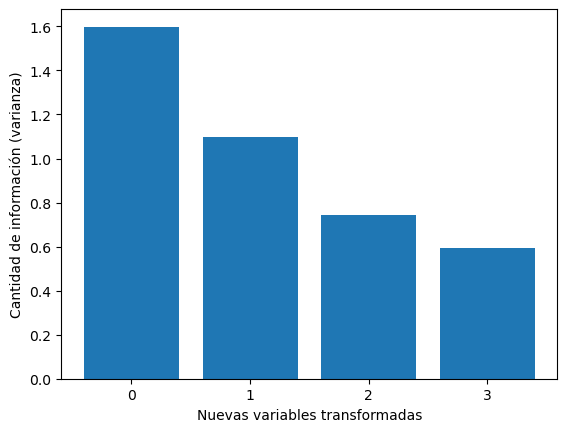

In [5]:
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('Nuevas variables transformadas')
plt.ylabel('Cantidad de información (varianza)')
plt.xticks(features)
plt.show()

In [6]:
BaseCategorizacion = EPP.join(CT).join(IPT).join(PI)

scaler = StandardScaler()
BaseTransformada = scaler.fit_transform(BaseCategorizacion)

pca = PCA(n_components=4)
pca.fit(BaseTransformada)
pca_features = pca.transform(BaseTransformada)

model = KMeans(n_clusters=5, random_state=12345)
labels = model.fit_predict(pca_features)
BaseCategorizacion["Categorias"] = model.labels_

In [7]:
BaseCategorizacion.groupby("Categorias").count()

,MedianaEmisiones,MedianaTuristas,MedianaIngresos,MedianaInflacion
Categorias,,,,
0,30,30,30,30
1,12,12,12,12
2,65,65,65,65
3,7,7,7,7
4,3,3,3,3


In [8]:
# la categoria con 3 ciudades posee un perfil alto emisiones contaminantes, 
#                             el mas bajo turismo, los mayores ingresos por turismo y la menor inflacion 

# la categoria con 7 ciudades tiene un perfil enfocado en la visita de turistas, con una inflacion media,
#                             ingresos medios y baja inflacion

# la categoria con 65 ciudades se caracteriza por ser las mas seguras para realizar emprendimientos turisticos
#                             basados en los criterios elegidos, ya que presenta emisiones contaminantes consistentes,
#                             alta frecuencia de viajeros y turistas, una ganancia promedio por persona y una inflacion estandar


# la categoria con 12 ciudades es la mas riesgosa basada en los criterios elegidos, ya que posee altos indices de inflacion
#                             pocas ganancias por turistas, y una emision contaminante ya controlada en un aspecto mayoritario

# la categoria con 30 ciudades es la que posee un perfil similar al del perfil de 65 caracteristicas, con la particularidad de 
#                             recibir mejores ingresos por turismo a coste de una mayor contaminacion


# las categorias recomendadas para realizar el emprendimiento son las categorias con 65 y 30 ciudades, en caso de querer una 

#Para reducir la amplitud de la categoria se realizara un estudio de similitud con el pais ya conocido (Colombia)
#Resumen de categorias
BaseCategorizacion.groupby("Categorias").mean()

,MedianaEmisiones,MedianaTuristas,MedianaIngresos,MedianaInflacion
Categorias,,,,
0,5.452619,6.962117e+06,954.875331,2.280919
1,1.171838,6.801583e+06,477.669279,19.512679
2,1.073997,3.410834e+06,605.920412,5.839578
3,3.263012,9.343117e+07,410.251008,3.296046
4,7.495981,2.941667e+06,3776.241379,2.527697


In [9]:
#Categorias que comparten similitud y cercania con colombia (misma categoria)
BaseCategorizacion[BaseCategorizacion.Categorias==BaseCategorizacion.loc["Colombia"]["Categorias"]][:30]

,MedianaEmisiones,MedianaTuristas,MedianaIngresos,MedianaInflacion,Categorias
pais,,,,,
Albania,1.138369,1273500.0,509.726781,3.454432,2
Algeria,1.054637,1674000.0,106.544636,10.546704,2
Armenia,0.294484,446500.0,806.054677,4.440033,2
Azerbaijan,1.530843,1306000.0,296.745485,12.338825,2
Bahrain,3.502394,7010500.0,144.754664,3.014766,2
Bangladesh,0.070625,199000.0,340.659341,5.049022,2
Belize,1.639050,970000.0,288.120407,1.933772,2
"Bolivia, Plurinational State of",0.711985,548500.0,464.369628,6.061400,2
Brazil,1.291120,5107000.0,881.620883,8.010501,2


In [10]:
#Calcular similitud con colombia 
# BaseCategorizacion["Similitud"] = [np.abs(1 - spatial.distance.cosine(pca_features[24], i)) for i in pca_features]
BaseCategorizacion["Similitud"] = [np.abs(1 - spatial.distance.cosine(pca_features[np.where(BaseCategorizacion.index.values=="Colombia")[0][0]], i)) for i in pca_features]

In [11]:
#los 40 paises con la misma categoria y la mayor similitud en cuento a los 4 criterios elegidos 
BaseCategorizacion[BaseCategorizacion.Categorias==BaseCategorizacion.loc["Colombia"]["Categorias"]].sort_values(by="Similitud",ascending=False)[:40]

,MedianaEmisiones,MedianaTuristas,MedianaIngresos,MedianaInflacion,Categorias,Similitud
pais,,,,,,
Colombia,0.850702,1898500.0,1278.496153,6.518448,2,1.000000
India,0.270308,5082000.0,1639.671698,6.944418,2,0.974986
"Tanzania, United Republic of",0.082212,714000.0,1590.529248,9.041662,2,0.966181
Dominican Republic,1.635392,4316500.0,923.596429,6.040739,2,0.953060
Mauritius,1.817734,848500.0,1232.983224,5.355399,2,0.925111
"Moldova, Republic of",0.729471,65500.0,2381.101190,9.344144,2,0.906850
Philippines,0.550045,2930000.0,959.889790,5.111587,2,0.853060
Mali,0.072508,143000.0,1131.008725,3.512882,2,0.848890
Indonesia,0.708345,5413500.0,1008.818917,8.550727,2,0.845002


In [12]:
#ambas categorias parecen ser mas adecuadas, en especial la de 30 paises, siendo estos representantes mas idoneos segun el criterio elegido
#sin embargo, debido al desconocimiento inicial de los terrenos, existe una mayor probabilidad de riesgo en este 
#debido a ello, para asegurar un desarrollo inicial satisfactorio, se recomienda utilizar la categoria de 65 elementos
#con algunos de los paises mas similares a colombia, ya que son terrenos conocidos y en segunda instancia innovar en paises
#de la categoria de 30 elementos

BaseCategorizacion[BaseCategorizacion.Categorias==0].sort_values(by="Similitud",ascending=False)

,MedianaEmisiones,MedianaTuristas,MedianaIngresos,MedianaInflacion,Categorias,Similitud
pais,,,,,,
Maldives,1.958804,636500.0,2007.265993,4.100414,0,0.830311
Canada,7.378129,32430000.0,513.778685,1.902620,0,0.754889
Kuwait,18.229372,4190500.0,56.008643,5.034470,0,0.681900
Bahamas,5.785039,4688000.0,414.250437,1.433321,0,0.672920
Saint Kitts and Nevis,4.264780,381000.0,299.225547,1.990850,0,0.634519
Ireland,4.507247,7333000.0,547.688141,2.284162,0,0.627706
Antigua and Barbuda,5.166443,774000.0,488.138887,1.873672,0,0.575770
Malta,5.806538,1564500.0,559.439492,2.275316,0,0.571958
Bermuda,8.859741,566000.0,772.951552,2.926445,0,0.496443


In [13]:
BaseCategorizacion.loc[["Colombia","Brazil","Hong Kong","South Africa","Argentina"]]
# BaseCategorizacion.loc["Argentina"]

,MedianaEmisiones,MedianaTuristas,MedianaIngresos,MedianaInflacion,Categorias,Similitud
pais,,,,,,
Colombia,0.850702,1898500.0,1278.496153,6.518448,2,1.000000
Brazil,1.291120,5107000.0,881.620883,8.010501,2,0.783637
Hong Kong,1.726251,26710000.0,541.822873,1.812438,2,0.324423
South Africa,0.965446,8858500.0,620.888621,6.888834,2,0.319520
Argentina,1.950208,4308000.0,801.354077,20.915124,1,0.165324
